In [1]:
import numpy as np
import qldpc

In [2]:
code = qldpc.codes.ClassicalCode(np.array([[1, 1, 1]]))
code.get_code_params()

(3, 2, 2)

In [3]:
repetition_code = qldpc.codes.RepetitionCode(2)
repetition_code.get_code_params()
n2 = repetition_code.get_code_params()[0]

In [4]:
# concatenate
pcm = np.array([np.outer(code.matrix[0], repetition_code.matrix).flatten()])
pcm

array([[1, 1, 1, 1, 1, 1]], dtype=uint8)

In [5]:
for i in range(len(code.matrix[0])):
    row = np.zeros(pcm.shape[1], dtype=int)
    row[n2*i:n2*(i+1)] = np.ones(n2, dtype=int)
    pcm = np.append(pcm, np.array([row]), axis=0)
    

In [6]:
pcm

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1]])

In [7]:
concat_code = code = qldpc.codes.ClassicalCode(pcm)
concat_code.get_code_params()

(6, 3, 2)

In [22]:
pcm_copy = np.array([
    [1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1],
]
)

In [23]:
concat_code = code = qldpc.codes.ClassicalCode(pcm_copy)
concat_code.get_code_params()

(6, 2, 4)

In [28]:
lresc = qldpc.codes.HGPCode(concat_code, concat_code)
lresc.get_code_params()

(52, 4, 4)

In [25]:
lresc.num_qubits

52

In [26]:
graph = concat_code.matrix_to_graph(concat_code.matrix)


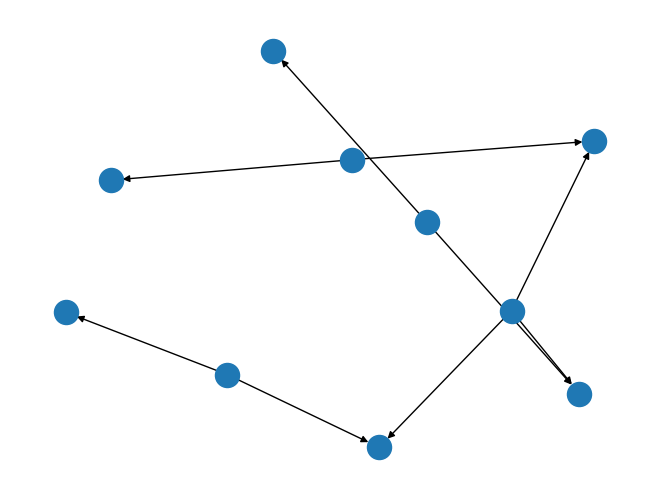

In [27]:
import networkx as nx
nx.draw(graph)